In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def combine(Okk0,Okk1,Skk0,Skk1,bnum):
    Vkk0 = np.std(Skk0,axis=0)
    Vkk1 = np.std(Skk1,axis=0)
    V01 = np.array( [ np.cov(Skk0[:,b],Skk1[:,b])[0,1] for b in range(bnum)] )
    g0 = Vkk1**2 - V01
    g1 = Vkk0**2 - V01
    Nkk = 1./(Vkk0**2+Vkk1**2-2*V01)
    Skk = Nkk * (g0*Okk0+g1*Okk1)
    return Skk

In [12]:
def plot_spec(qobj0,qobj1,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10,output=True):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    __, Vkk0, Skk0, __, nb0 = local.load_spec(qobj0,mb,rlz=rlz,cn=cn,outN0=True)
    __, Vkk1, Skk1, __, nb1 = local.load_spec(qobj1,mb,rlz=rlz,cn=cn,outN0=True)
    Skk = np.array( [ ana.combine(Skk0[i,:],Skk1[i,:],np.delete(Skk0,i,0),np.delete(Skk1,i,0),bnum) for i in range(len(Skk0[:,0]))] )
    print(Skk[0,:])
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
#    print(2*Nkk*Vkk**2)
    print(np.sqrt(np.sum(Mkk**2/Vkk**2)))
    st = ana.amplitude(Mkk,Skk,fcb=None,diag=False,disp=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$C_L^{\kappa\kappa}$')
    errorbar(mb.bc+5,Mkk,yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    axhline(0,color='k')
    show()
    if output: return mb, Mkk, Vkk, nb0

In [4]:
dirs = local.data_directory()
qobj, Qobj = {}, {}
for qid, wtype, ascale in [('comb_s16d','com16v0PT',1.),('comb_dn','com15v0PT',1.)]:
    aobj = local.init_analysis_params(qid=qid,ascale=ascale,wtype=wtype)
    qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [5]:
qobj0 = Qobj['com16v0PT']
qobj1 = Qobj['com15v0PT']

[1.06180130e-07 4.66636957e-08 2.48652759e-08 1.88066345e-08
 1.09366855e-08 1.14375959e-08 8.22310906e-09 7.65441036e-09
 7.35790315e-09 6.58357755e-09]
15.619625623954141
obs A 1.0 mean(A) 1.0 sigma(A) 0.092 S/N 10.869 A>oA 0.98


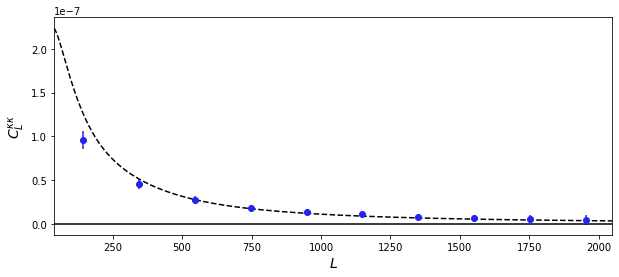

(<binning.multipole_binning at 0x2aaaf05065c0>,
 array([9.59193397e-08, 4.56770081e-08, 2.71226851e-08, 1.78450950e-08,
        1.34171099e-08, 1.11192904e-08, 8.07508479e-09, 6.59328354e-09,
        5.65953433e-09, 4.27470972e-09]),
 array([1.02267052e-08, 5.48618667e-09, 4.67631724e-09, 4.16039906e-09,
        3.83447264e-09, 3.18050746e-09, 3.63694883e-09, 3.77488381e-09,
        4.47909065e-09, 5.51329620e-09]),
 array([2.28386825e-07, 2.87161774e-07, 2.95255933e-07, 3.03554635e-07,
        3.15555942e-07, 3.28570584e-07, 3.52267769e-07, 3.86603157e-07,
        4.47130213e-07, 5.44753427e-07]))

In [13]:
plot_spec(qobj0,qobj1,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10,output=True)